# 逻辑回归

(100, 1)
(100,)
[[2.2849183]]
[-1.90900846]
[0.12909229 0.59288623 0.93467525]
accuracy: 99.0


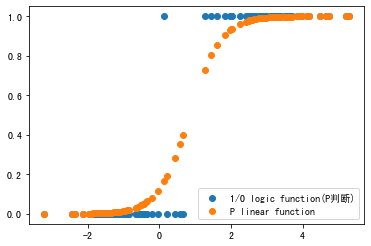

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_train = np.r_[np.random.normal(3, 1, size=50), np.random.normal(-1, 1, size=50)].reshape((100, -1))
y_train = np.r_[np.ones(50), np.zeros(50)]
print(X_train.shape)
print(y_train.shape)
plt.scatter(X_train,y_train,label="1/0 logic function(P判断)")

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

print(model.predict_proba([[0], [1], [2]])[:, 1])
plt.scatter(X_train, model.predict_proba(X_train)[:, 1], label="P linear function")


y_predict = model.predict(X_train)
print('accuracy:', sum(y_predict==y_train)/len(y_predict)*100)
# print(model.get_params())

plt.legend()
plt.show()


In [ ]:
# sigmod(WX+b) 构建 逻辑回归
def sigmoid(inputs):
    sigmoid_scores = [
          1 / float(1 + np.exp(- x)) 
          for x in inputs
    ]
    return sigmoid_scores

linearOutput= X_train*model.coef_+model.intercept_
sigmoidOutput = sigmoid(linearOutput.reshape(-1,1))

plt.scatter(X_train,y_train,label="1/0 logic function(P判断)")
plt.scatter(X_train,sigmoidOutput, label="P linear function - sigmoid" )
plt.legend()
plt.show()

## sigmoid激活函数

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.arange(-10, 10, 0.001)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.suptitle(r'$y=\frac{1}{1+e^{-x}}$', fontsize=20)
plt.grid(color='gray')
plt.grid(linewidth='1')
plt.grid(linestyle='--')

plt.show()


## 决策边界

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([ X,y], axis=1)
df.head()

Duplicate key in file PosixPath('/Users/alphajay/.virtualenvs/ml/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 405 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[[ 0.88987787 -2.92184279]
 [-0.34066053 -0.41031516]
 [-0.54921735  3.33215794]]
[  8.01853613   4.8096657  -12.82820183]


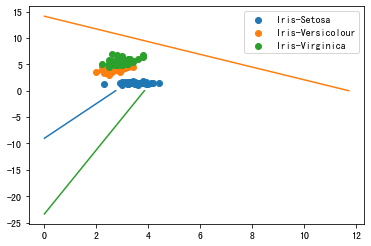

In [8]:
species = [ 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica' ]

for target in species:
    #  df.iloc 
    # https://zhuanlan.zhihu.com/p/76241647
    # https://blog.csdn.net/weixin_48701352/article/details/120247544
    x1_data = df[ df['Species']==species.index(target)].iloc[:, 1]
    x2_data = df[ df['Species']==species.index(target)].iloc[:, 2]
    y_data = df.iloc[:, -1]
    plt.scatter(x1_data, x2_data, label=f"{target}" )

model = LogisticRegression()
model.fit(df.iloc[:, [1,2]],  df.iloc[:, -1] )
print(model.coef_)
print(model.intercept_)

'''
for index in range(3):
    W1=model.coef_[index][0]
    W2=model.coef_[index][1]
    bias=model.intercept_[index]
    plt.plot([0,-bias/W2], [-bias/W1,0])
'''

plt.legend()
plt.show()
